In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# Instead of importing np_utils, import to_categorical directly from tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical 
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
Crema = "/Users/pauljohnmaddala/Desktop/samples/kagglehub/datasets/ejlok1/cremad/versions/1/AudioWAV/"

crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()


,Emotions,Path
0,angry,/Users/pauljohnmaddala/Desktop/samples/kaggleh...
1,angry,/Users/pauljohnmaddala/Desktop/samples/kaggleh...
2,neutral,/Users/pauljohnmaddala/Desktop/samples/kaggleh...
3,neutral,/Users/pauljohnmaddala/Desktop/samples/kaggleh...
4,disgust,/Users/pauljohnmaddala/Desktop/samples/kaggleh...


In [3]:
Crema_df.to_csv("Crema_df.csv",index=False)


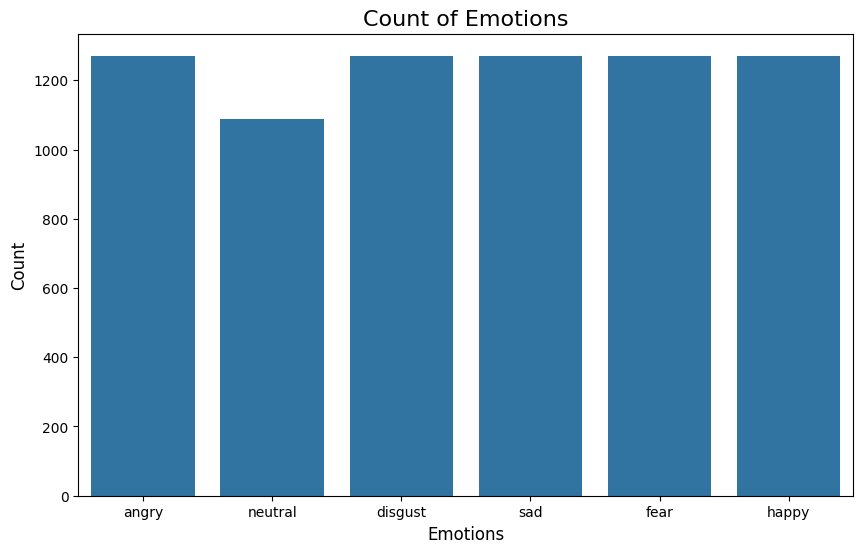

In [4]:
plt.figure(figsize=(10, 6))
plt.title('Count of Emotions', size=16)

# Use the 'x' keyword argument to specify the column to plot
sns.countplot(x='Emotions', data=Crema_df)

plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.show()

In [5]:
def create_waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {emotion} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

# Spectrogram creation function
def create_spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    stft = librosa.stft(data)
    stft_db = librosa.amplitude_to_db(np.abs(stft))
    plt.title(f'Spectrogram for audio with {emotion} emotion', size=15)
    librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

In [101]:
import speech_recognition as sr

recognizer = sr.Recognizer()
recognizer.pause_threshold = 0.8  # Stop listening after 2 seconds of silence


# Capture audio from microphone
with sr.Microphone() as source:
    print("Listening...")
    audio = recognizer.listen(source, phrase_time_limit=10)
    print(type(audio))


# Convert speech to text
try:
    text = recognizer.recognize_google(audio)
    print("You said:", text)
    #print("With emotion: ", emotion_detection.predict(audio))
    #print text
except sr.UnknownValueError:
    print("Sorry, I could not understand the audio.")
    #return "Sorry, I could not understand the audio."
except sr.RequestError:
    print("Could not request results from Google Speech Recognition service.")
    #return "Could not request results from Google Speech Recognition service."


Listening...
<class 'speech_recognition.audio.AudioData'>
You said: Hi how are you is everything going good sorry I could not understand the Audio I could not question results from Google


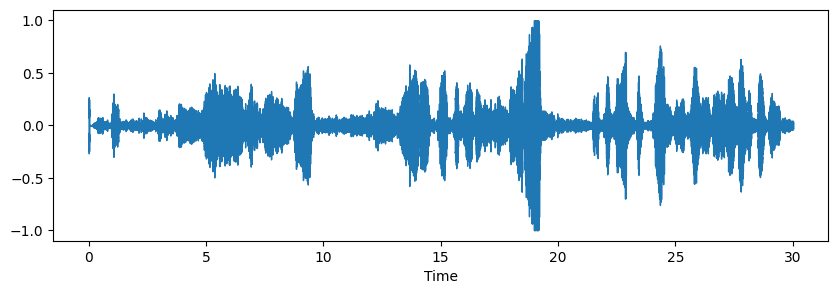

In [102]:
import IPython.display as ipd

# Convert audio to np.array
audio_data = audio.get_raw_data()
audio_np = np.frombuffer(audio_data, dtype=np.int16)

# Convert to floating-point format and normalize
audio_np = audio_np.astype(np.float32) / np.max(np.abs(audio_np))

# Plot the waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(audio_np, sr=16000)  # Replace 16000 with the actual sample rate if known
plt.show()

# Play the recorded audio
ipd.Audio(data=audio_np, rate=50000)

[3.4328282e-04 3.5578036e-04 5.1726412e-04 ... 2.0231486e-05 6.2527170e-07
 0.0000000e+00]


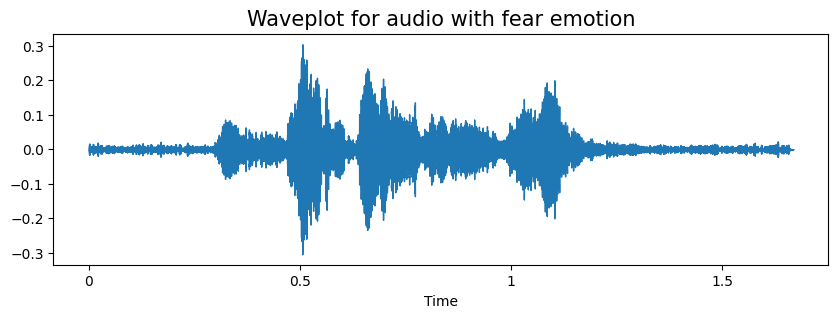

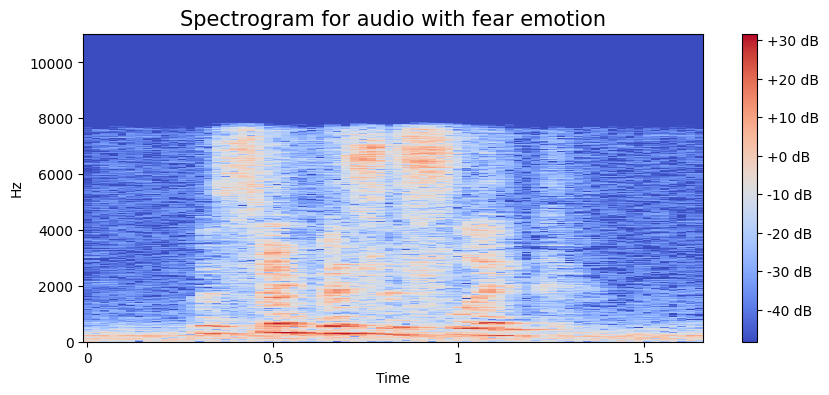

In [75]:
# Load and visualize audio data
emotion = 'fear'
try:
    # Fetch the file path for the specified emotion
    paths = np.array(Crema_df.Path[Crema_df.Emotions == emotion])
    
    if len(paths) > 1:
        path = paths[1]  # Ensure there is at least one matching file
        data, sampling_rate = librosa.load(path)
        
        print(data)

        # Create waveplot and spectrogram
        create_waveplot(data, sampling_rate, emotion)
        create_spectrogram(data, sampling_rate, emotion)
        
        # Play the audio
        display(Audio(path))
    else:
        print(f"No audio found for emotion: {emotion}")
except Exception as e:
    print(f"An error occurred: {e}")

In [58]:
data0 = librosa.load(audio)

TypeError: Invalid file: <speech_recognition.audio.AudioData object at 0x162d431a0>

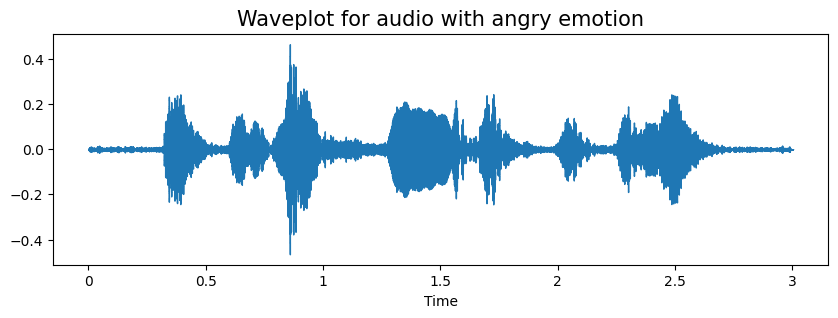

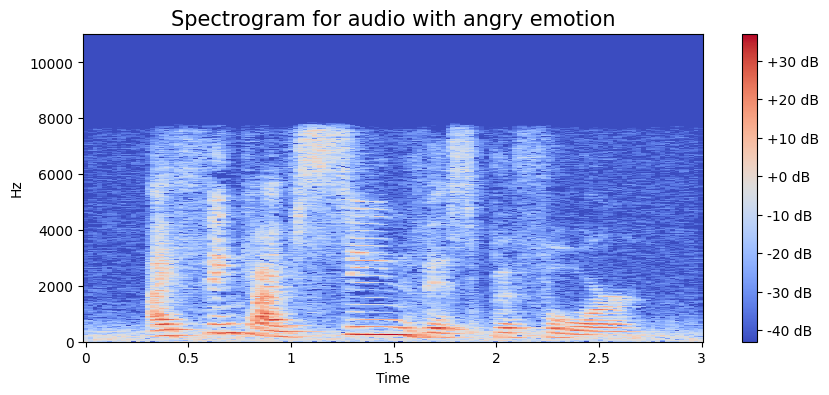

In [7]:
# Load and visualize audio data
emotion = 'angry'
try:
    # Fetch the file path for the specified emotion
    paths = np.array(Crema_df.Path[Crema_df.Emotions == emotion])
    
    if len(paths) > 1:
        path = paths[1]  # Ensure there is at least one matching file
        data, sampling_rate = librosa.load(path)
        
        # Create waveplot and spectrogram
        create_waveplot(data, sampling_rate, emotion)
        create_spectrogram(data, sampling_rate, emotion)
        
        # Play the audio
        display(Audio(path))
    else:
        print(f"No audio found for emotion: {emotion}")
except Exception as e:
    print(f"An error occurred: {e}")

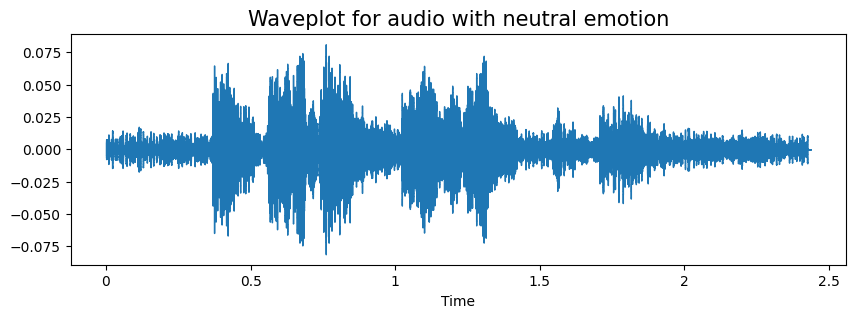

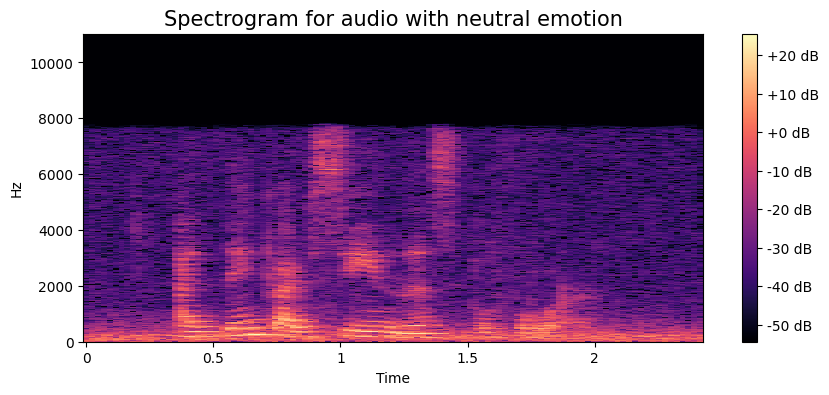

In [8]:
# Load and visualize audio data
emotion = 'neutral'
try:
    # Fetch the file path for the specified emotion
    paths = np.array(Crema_df.Path[Crema_df.Emotions == emotion])
    
    if len(paths) > 1:
        path = paths[1]  # Ensure there is at least one matching file
        data, sampling_rate = librosa.load(path)
        
        # Create waveplot and spectrogram
        create_waveplot(data, sampling_rate, emotion)
        create_spectrogram(data, sampling_rate, emotion)
        
        # Play the audio
        display(Audio(path))
    else:
        print(f"No audio found for emotion: {emotion}")
except Exception as e:
    print(f"An error occurred: {e}")

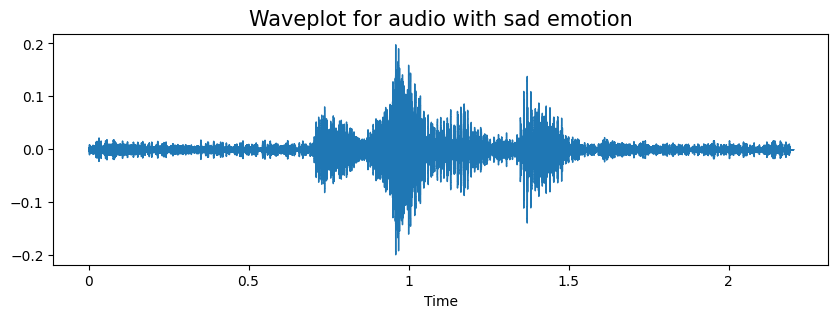

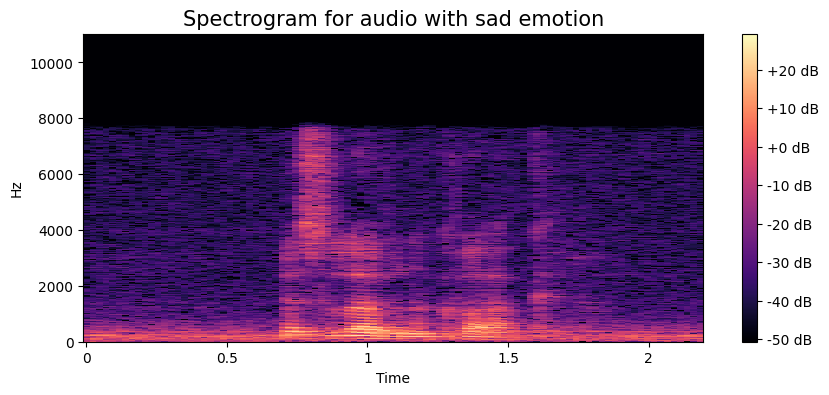

In [9]:
# Load and visualize audio data
emotion = 'sad'
try:
    # Fetch the file path for the specified emotion
    paths = np.array(Crema_df.Path[Crema_df.Emotions == emotion])
    
    if len(paths) > 1:
        path = paths[1]  # Ensure there is at least one matching file
        data, sampling_rate = librosa.load(path)
        
        # Create waveplot and spectrogram
        create_waveplot(data, sampling_rate, emotion)
        create_spectrogram(data, sampling_rate, emotion)
        
        # Play the audio
        display(Audio(path))
    else:
        print(f"No audio found for emotion: {emotion}")
except Exception as e:
    print(f"An error occurred: {e}")

In [10]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data, rate = 0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(Crema_df.Path)[1]
data, sample_rate = librosa.load(path)

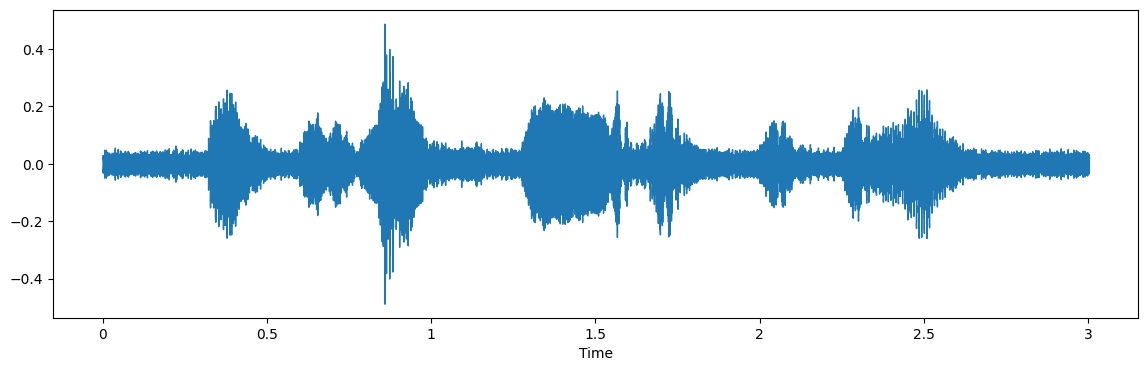

In [11]:
'''# Load and visualize audio data
emotion = 'sad'
try:
    # Fetch the file path for the specified emotion
    paths = np.array(Crema_df.Path[Crema_df.Emotions == emotion])
    
    if len(paths) > 1:
        path = paths[1]  # Ensure there is at least one matching file
        data, sampling_rate = librosa.load(path)
        
        # Create waveplot and spectrogram
        create_waveplot(data, sampling_rate, emotion)
        create_spectrogram(data, sampling_rate, emotion)
        
        # Play the audio
        display(Audio(path))
    else:
        print(f"No audio found for emotion: {emotion}")
except Exception as e:
    print(f"An error occurred: {e}")
'''
    
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

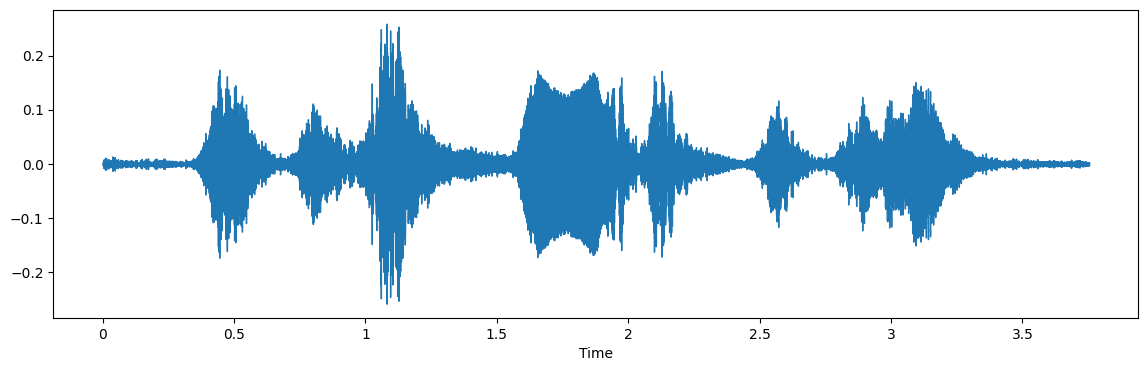

In [12]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

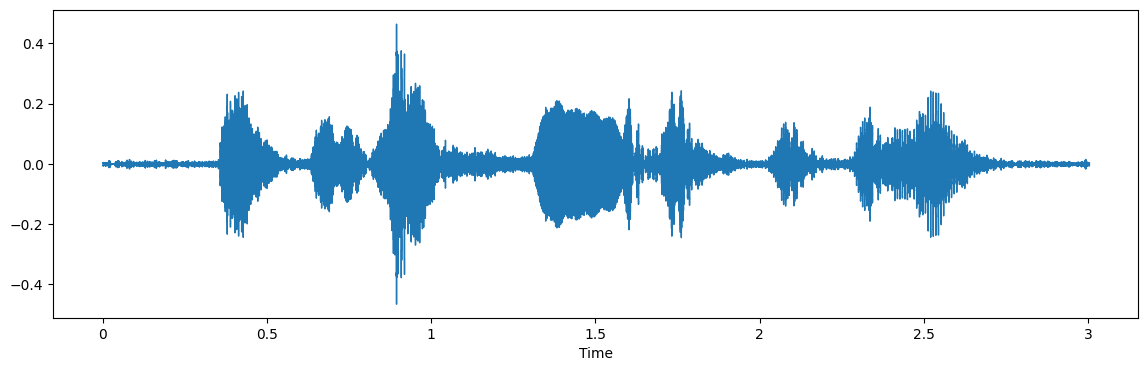

In [13]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

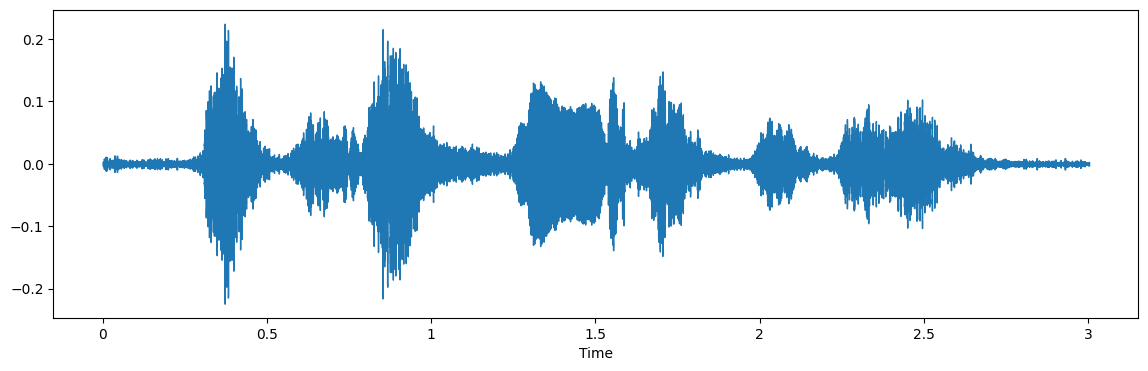

In [14]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [36]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [37]:
X, Y = [], []
for path, emotion in zip(Crema_df.Path, Crema_df.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [38]:
len(X), len(Y), Crema_df.Path.shape

(22326, 22326, (7442,))

In [39]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.100537,0.595252,0.551953,0.520970,0.469345,0.523831,0.499308,0.522859,0.581303,0.584584,...,3.271435e-08,3.422750e-08,3.566362e-08,3.697004e-08,3.813983e-08,3.918440e-08,4.004792e-08,4.072397e-08,4.113441e-08,angry
1,0.276794,0.714640,0.733548,0.692953,0.678027,0.697515,0.686544,0.614066,0.681470,0.654595,...,2.548794e-02,2.584711e-02,2.617441e-02,2.416485e-02,2.590889e-02,2.718893e-02,2.508900e-02,2.471067e-02,2.545439e-02,angry
2,0.104364,0.497752,0.632934,0.569837,0.512982,0.442736,0.501116,0.465970,0.491404,0.574312,...,2.177880e-08,2.235584e-08,2.281330e-08,2.315226e-08,2.343286e-08,2.390607e-08,2.462694e-08,2.047304e-08,6.826785e-09,angry
3,0.098154,0.591645,0.502407,0.504114,0.567158,0.523428,0.473053,0.553259,0.547363,0.501392,...,1.217809e-08,1.196999e-08,1.180585e-08,1.167067e-08,1.156780e-08,1.150207e-08,1.145566e-08,1.143310e-08,1.141606e-08,angry
4,0.164433,0.671927,0.595830,0.593582,0.656328,0.603392,0.506168,0.564889,0.571830,0.526601,...,1.135011e-03,1.142283e-03,1.118718e-03,1.199341e-03,1.153131e-03,1.190260e-03,1.218501e-03,1.104017e-03,1.165439e-03,angry


In [119]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [122]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [105]:
joblib.dump(encoder, 'onehot_encoder.pkl')

['onehot_encoder.pkl']

In [42]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16744, 162), (16744, 6), (5582, 162), (5582, 6))

In [43]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16744, 162), (16744, 6), (5582, 162), (5582, 6))

In [44]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16744, 162, 1), (16744, 6), (5582, 162, 1), (5582, 6))

In [48]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, 'scaler0.pkl')


['scaler0.pkl']

In [45]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

# Set the output layer to match the number of classes (6)
model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)              │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,222 (2.13 MB)

 Trainable params: 557,222 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 17s 61ms/step - accuracy: 0.2813 - loss: 1.6720 - val_accuracy: 0.3520 - val_loss: 1.5268 - learning_rate: 0.0010
Epoch 2/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.3512 - loss: 1.5349 - val_accuracy: 0.3870 - val_loss: 1.4919 - learning_rate: 0.0010
Epoch 3/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.3616 - loss: 1.5214 - val_accuracy: 0.3970 - val_loss: 1.4474 - learning_rate: 0.0010
Epoch 4/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.3875 - loss: 1.4780 - val_accuracy: 0.4210 - val_loss: 1.4131 - learning_rate: 0.0010
Epoch 5/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - accuracy: 0.3950 - loss: 1.4637 - val_accuracy: 0.4248 - val_loss: 1.4176 - learning_rate: 0.0010
Epoch 6/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.3956 - loss: 1.4562 - val_accuracy: 0.4253 - val_loss: 1.4138 - learning_rate: 0.0010
Epoch 7/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.4148 - l

In [ ]:
model.save('emotion_model0.h5')

In [103]:
# Ensure audio_np has the correct number of time steps (e.g., 162) for the model
required_time_steps = 162

# If audio_np has fewer samples, pad it; if it has more, truncate it
if audio_np.shape[0] < required_time_steps:
    audio_np = np.pad(audio_np, (0, required_time_steps - audio_np.shape[0]), mode='constant')
else:
    audio_np = audio_np[:required_time_steps]

# Reshape to (1, time_steps, 1) to match the model's expected input shape
audio_np = audio_np.reshape(1, required_time_steps, 1)

# Use the reshaped audio array for prediction
predictions = model.predict(audio_np)
print("Predicted class probabilities:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted class probabilities: [[0.19380878 0.36948365 0.02096499 0.3147454  0.09639632 0.004601  ]]


In [112]:
encoder.inverse_transform(predictions.reshape(1,-1))

ValueError: Shape of the passed X data is not correct. Expected 2 columns, got 6.

In [74]:
emotions = ['sad','angry','disgust','fear','happy','neutral']

predicted_index = np.argmax(predictions)

# Get the corresponding emotion label
predicted_emotion = emotions[predicted_index]

print("Predicted class probabilities:", predictions)
print("Predicted emotion:", predicted_emotion)


Predicted class probabilities: [[0.14288196 0.264976   0.08339103 0.28693417 0.17873332 0.04308357]]
Predicted emotion: fear


175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4973 - loss: 1.4767
Accuracy of our model on test data :  49.982085824012756 %


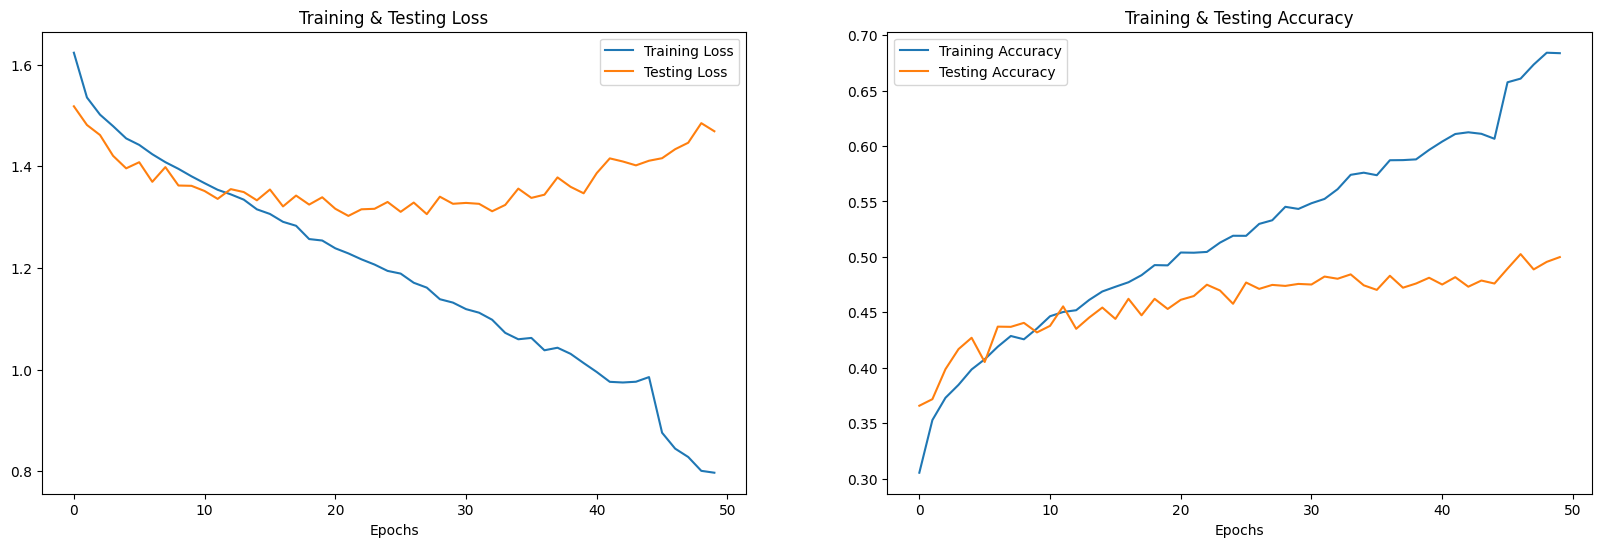

In [26]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [111]:
pred_test.shape, pred_test[0].shape

((5582, 6), (6,))

In [90]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [99]:
pred_test[:20]

array([[2.8578143e-08, 7.5496835e-05, 2.3545033e-01, 4.9287642e-05,
        3.2558006e-07, 7.6442450e-01],
       [3.5280433e-01, 2.1824606e-01, 1.0934314e-04, 4.2883962e-01,
        7.5498326e-07, 8.8838675e-10],
       [1.7005641e-03, 8.4187761e-02, 1.3742259e-01, 3.7887979e-02,
        4.5287222e-01, 2.8592899e-01],
       [3.1741679e-01, 2.1697862e-01, 4.1496120e-02, 4.2307043e-01,
        7.7143416e-04, 2.6658055e-04],
       [4.7295101e-02, 1.4590775e-02, 2.1690177e-03, 9.3580341e-01,
        1.4082517e-04, 9.2388171e-07],
       [1.7808917e-01, 3.6930886e-01, 3.3120704e-03, 2.2788787e-01,
        2.1961993e-01, 1.7822199e-03],
       [3.6553687e-05, 7.4500078e-01, 1.1097938e-02, 3.0448614e-03,
        8.1390530e-02, 1.5942933e-01],
       [4.7480786e-01, 3.8280627e-01, 1.3627129e-05, 1.4236477e-01,
        7.4858604e-06, 4.7989340e-10],
       [8.1925429e-02, 3.0998623e-01, 1.4240562e-02, 1.3189793e-01,
        4.2928138e-01, 3.2668516e-02],
       [1.1272595e-05, 1.8230484e-01,

In [94]:
y_pred[:20]

array([['sad'],
       ['happy'],
       ['neutral'],
       ['happy'],
       ['happy'],
       ['disgust'],
       ['disgust'],
       ['angry'],
       ['neutral'],
       ['sad'],
       ['disgust'],
       ['happy'],
       ['angry'],
       ['sad'],
       ['neutral'],
       ['sad'],
       ['sad'],
       ['angry'],
       ['sad'],
       ['happy']], dtype=object)

In [95]:
y_test[:20]

array([['sad'],
       ['angry'],
       ['sad'],
       ['happy'],
       ['happy'],
       ['happy'],
       ['sad'],
       ['angry'],
       ['neutral'],
       ['fear'],
       ['disgust'],
       ['angry'],
       ['angry'],
       ['fear'],
       ['disgust'],
       ['happy'],
       ['sad'],
       ['angry'],
       ['happy'],
       ['happy']], dtype=object)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(20)

,Predicted Labels,Actual Labels
0,sad,sad
1,happy,angry
2,neutral,sad
3,happy,happy
4,happy,happy
5,disgust,happy
6,disgust,sad
7,angry,angry
8,neutral,neutral
9,sad,fear


In [96]:
df.head(20)

,Predicted Labels,Actual Labels
0,sad,sad
1,happy,angry
2,neutral,sad
3,happy,happy
4,happy,happy
5,disgust,happy
6,disgust,sad
7,angry,angry
8,neutral,neutral
9,sad,fear


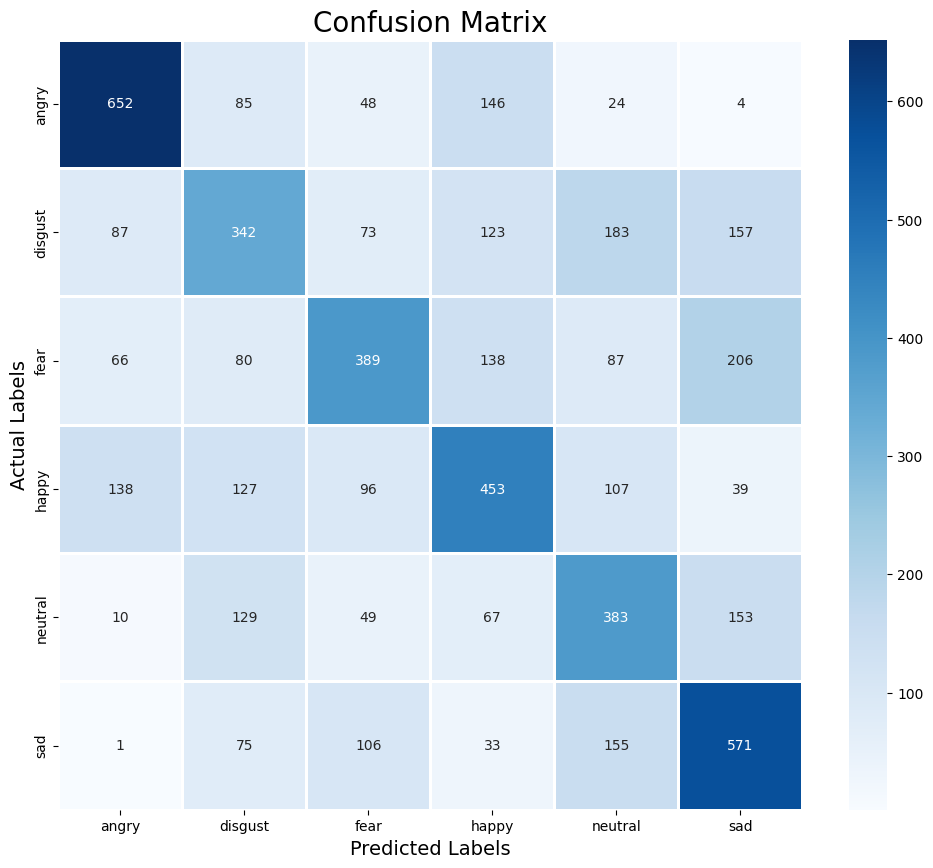

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.68      0.68      0.68       959
     disgust       0.41      0.35      0.38       965
        fear       0.51      0.40      0.45       966
       happy       0.47      0.47      0.47       960
     neutral       0.41      0.48      0.44       791
         sad       0.51      0.61      0.55       941

    accuracy                           0.50      5582
   macro avg       0.50      0.50      0.50      5582
weighted avg       0.50      0.50      0.50      5582



In [32]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D
from keras.layers import LeakyReLU

model1 = Sequential()

# First Convolutional Block
model1.add(Conv1D(256, kernel_size=5, strides=1, padding='same', input_shape=(x_train.shape[1], 1)))
model1.add(BatchNormalization())
model1.add(LeakyReLU(alpha=0.1))
model1.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

# Second Convolutional Block
model1.add(Conv1D(256, kernel_size=5, strides=1, padding='same'))
model1.add(BatchNormalization())
model1.add(LeakyReLU(alpha=0.1))
model1.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

# Third Convolutional Block
model1.add(Conv1D(128, kernel_size=5, strides=1, padding='same'))
model1.add(BatchNormalization())
model1.add(LeakyReLU(alpha=0.1))
model1.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))
model1.add(Dropout(0.3))  # Increased dropout for regularization

# Fourth Convolutional Block
model1.add(Conv1D(64, kernel_size=5, strides=1, padding='same'))
model1.add(BatchNormalization())
model1.add(LeakyReLU(alpha=0.1))
model1.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

# Fifth Convolutional Block (additional layer)
model1.add(Conv1D(32, kernel_size=3, strides=1, padding='same'))
model1.add(BatchNormalization())
model1.add(LeakyReLU(alpha=0.1))
model1.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

# Global Average Pooling Layer
model1.add(GlobalAveragePooling1D())

# Fully Connected Layer
model1.add(Dense(units=64, activation='relu'))
model1.add(Dropout(0.4))  # Increased dropout for further regularization

# Output Layer
model1.add(Dense(units=6, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 162, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 162, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 81, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 41, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 41, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 21, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 11, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │             

 Total params: 546,086 (2.08 MB)

 Trainable params: 544,614 (2.08 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [33]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model1.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.2761 - loss: 1.6772

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 6)